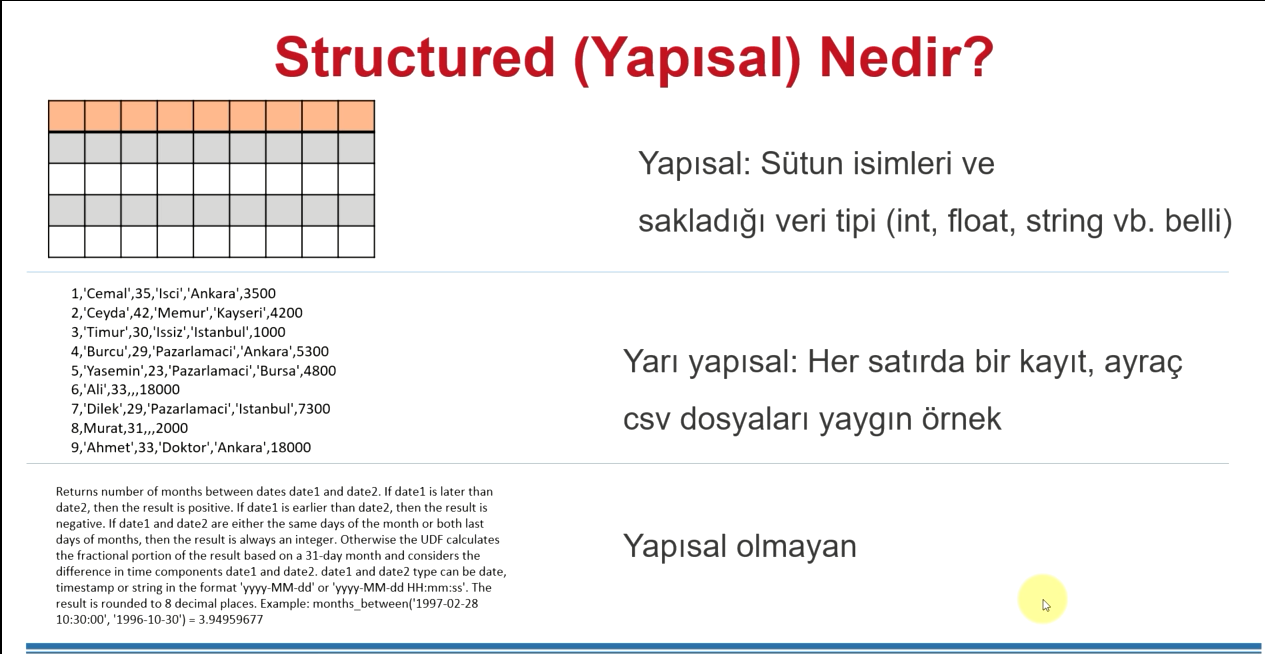

In [32]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark1.png")

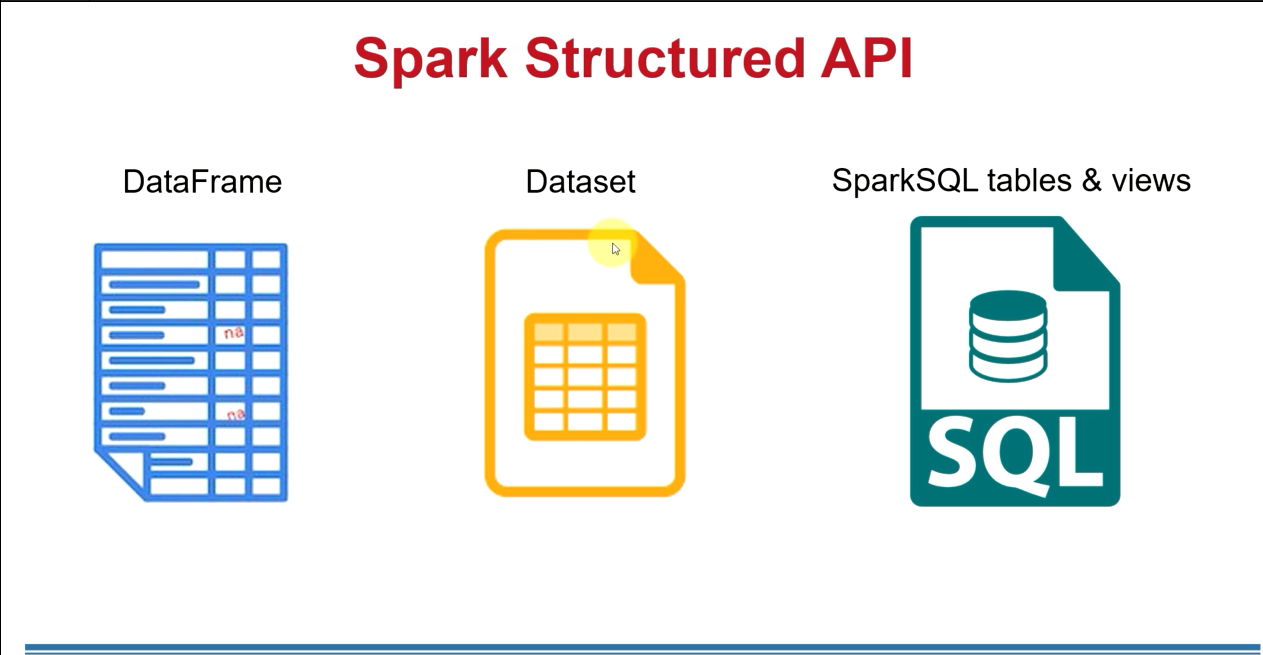

In [20]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark2.png")

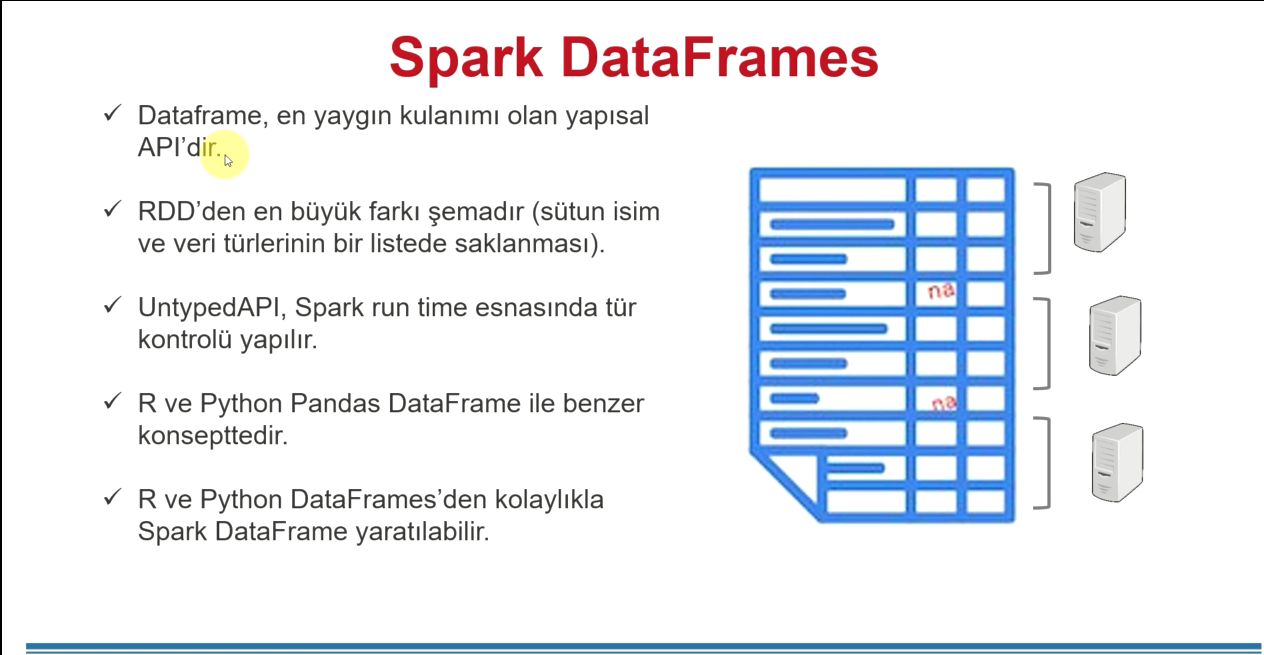

In [21]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark3.png")

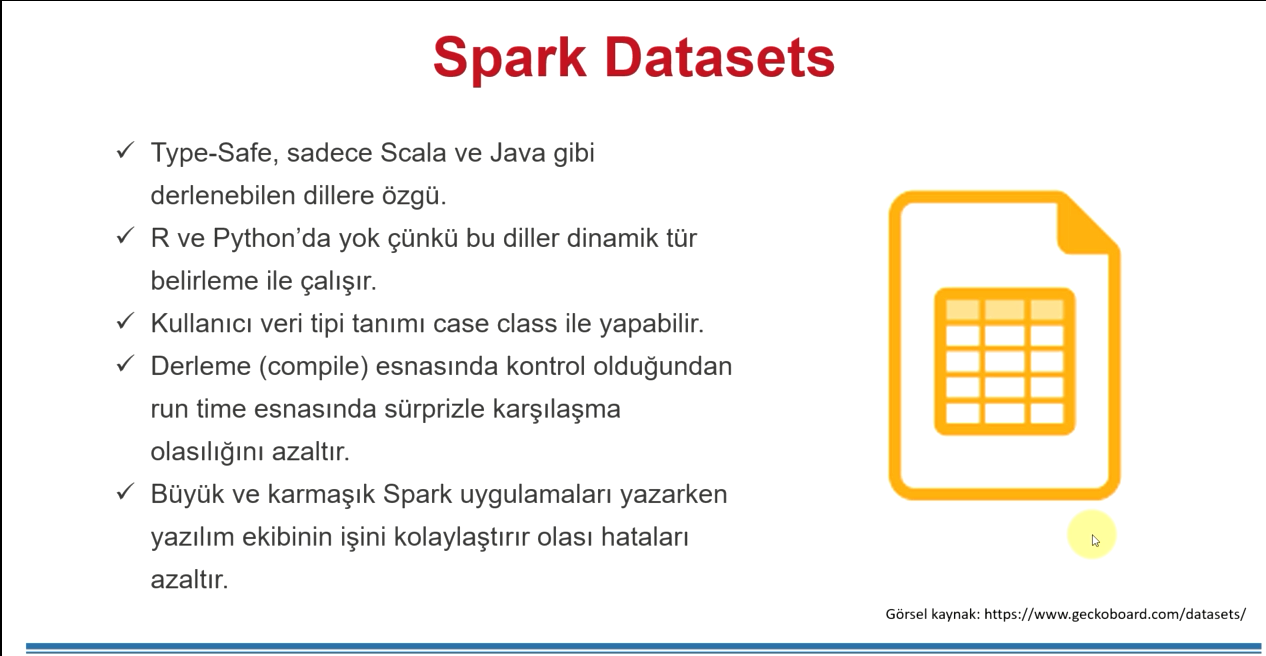

In [22]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark4.png")

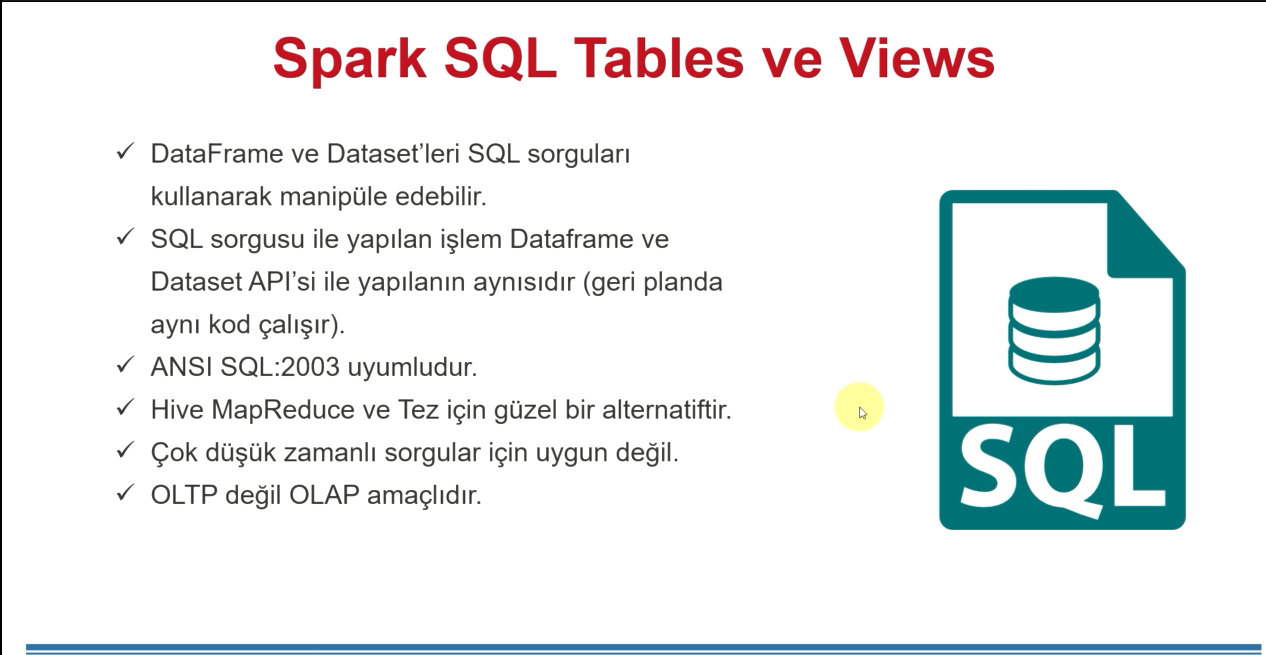

In [23]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark5.png")

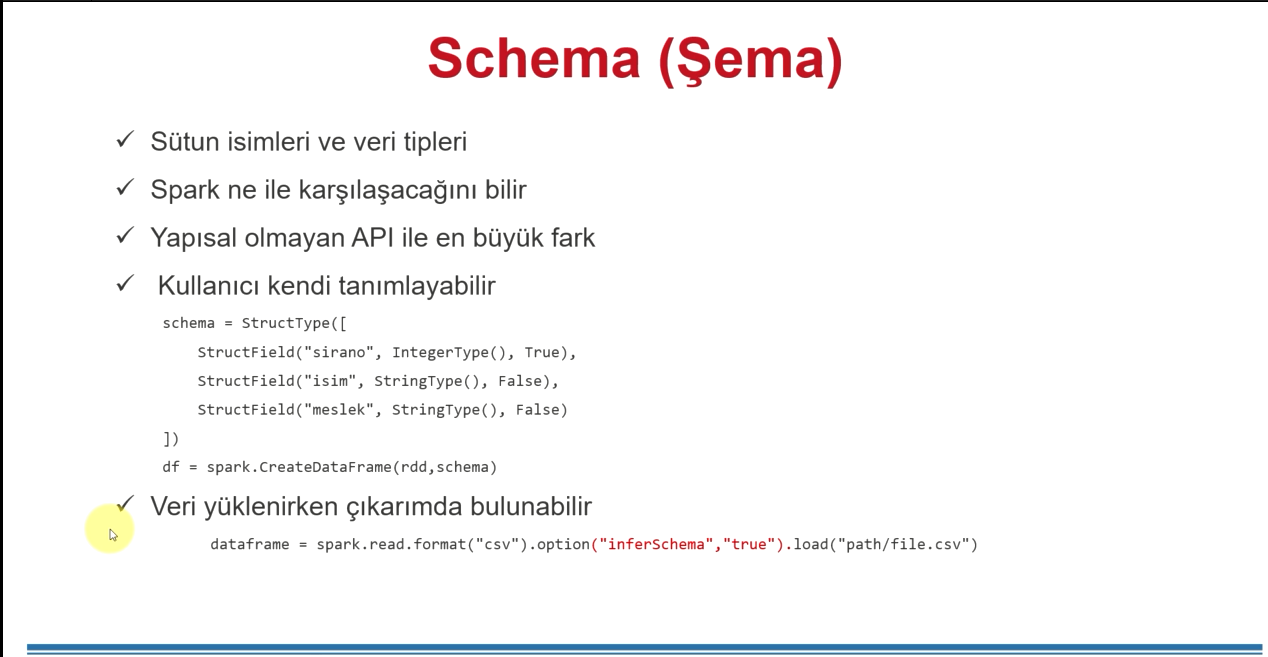

In [24]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark6.png")

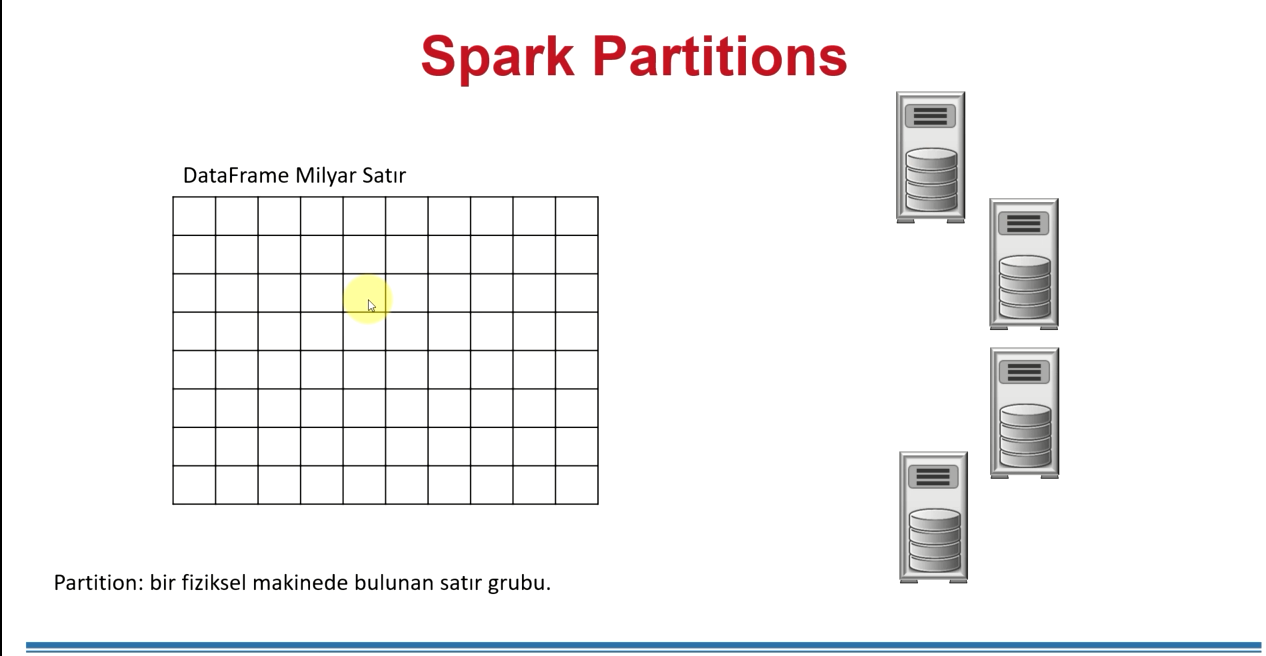

In [25]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark7.png")

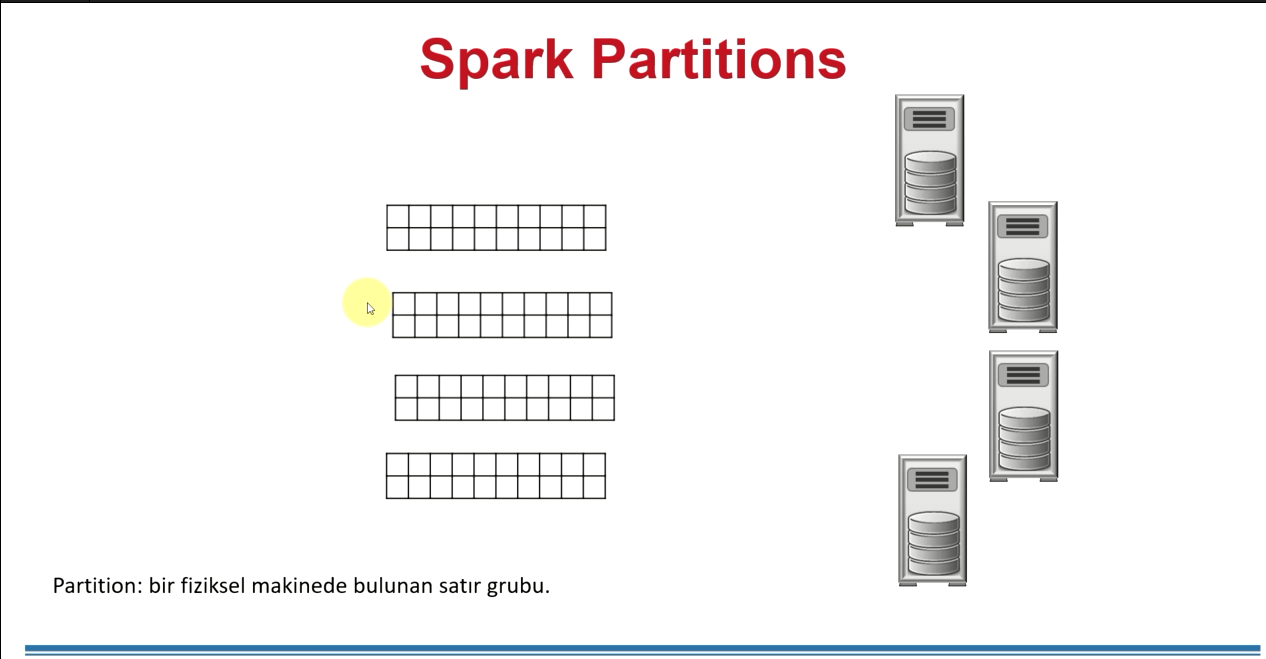

In [26]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark8.png")

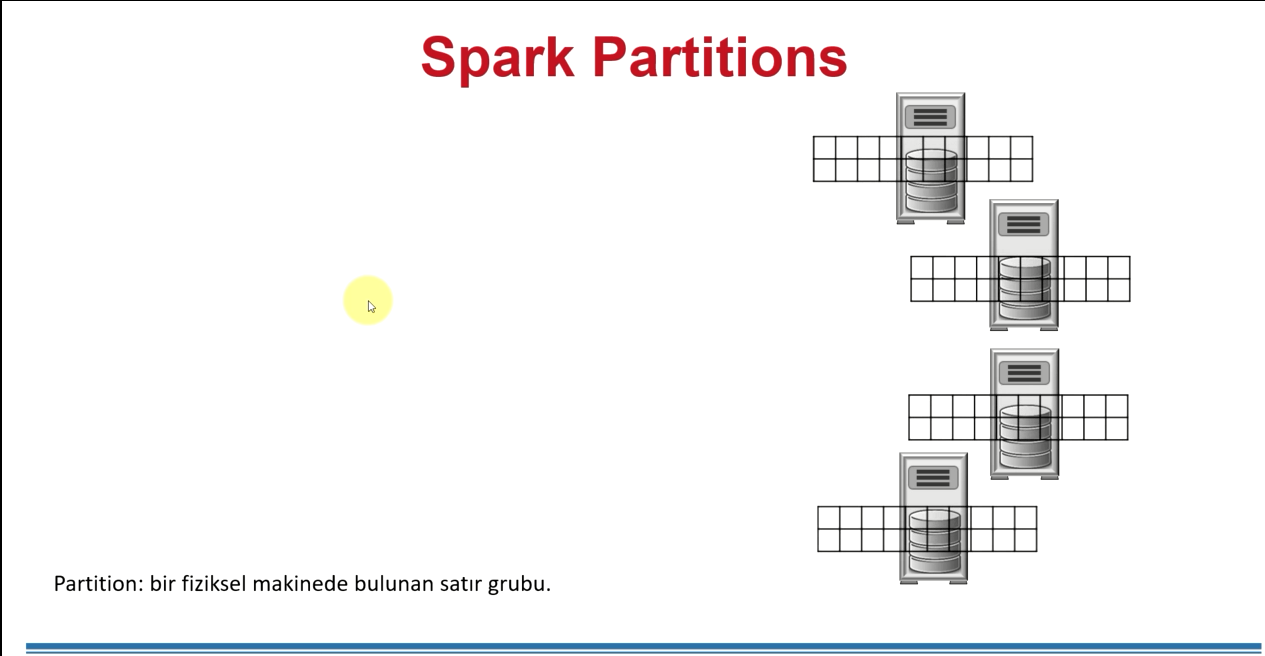

In [27]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark9.png")

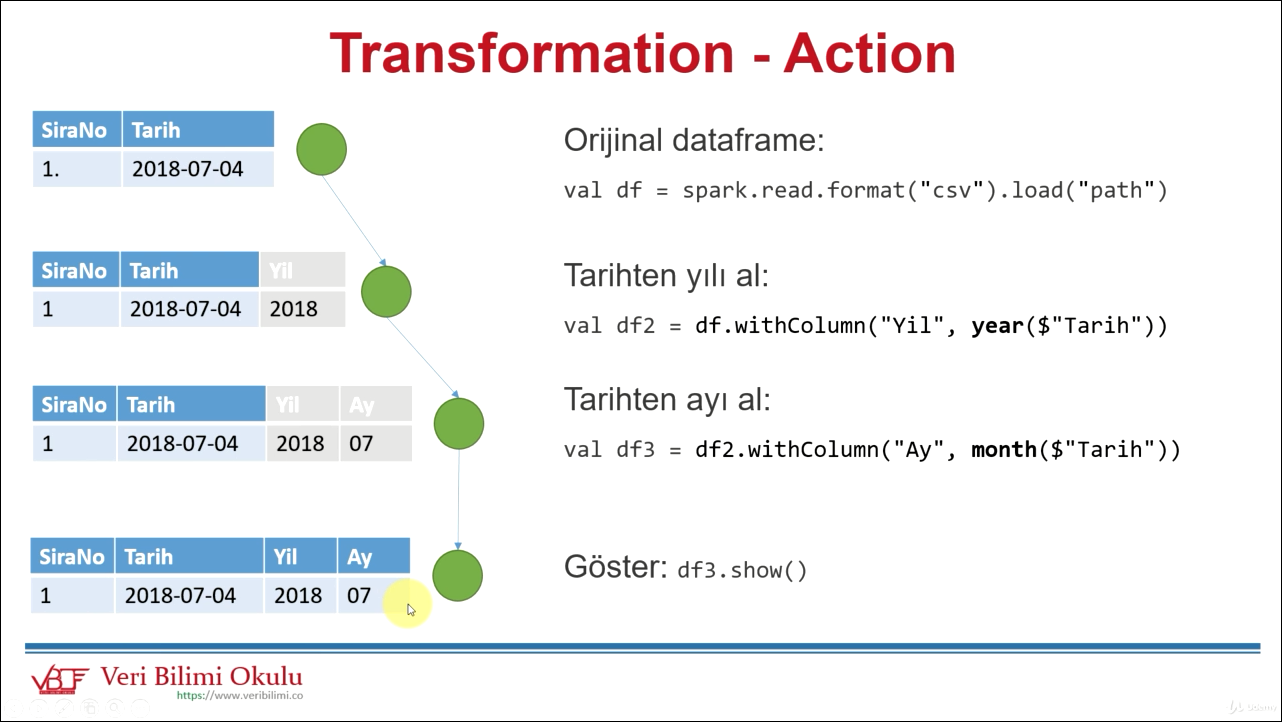

In [28]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark10.png")

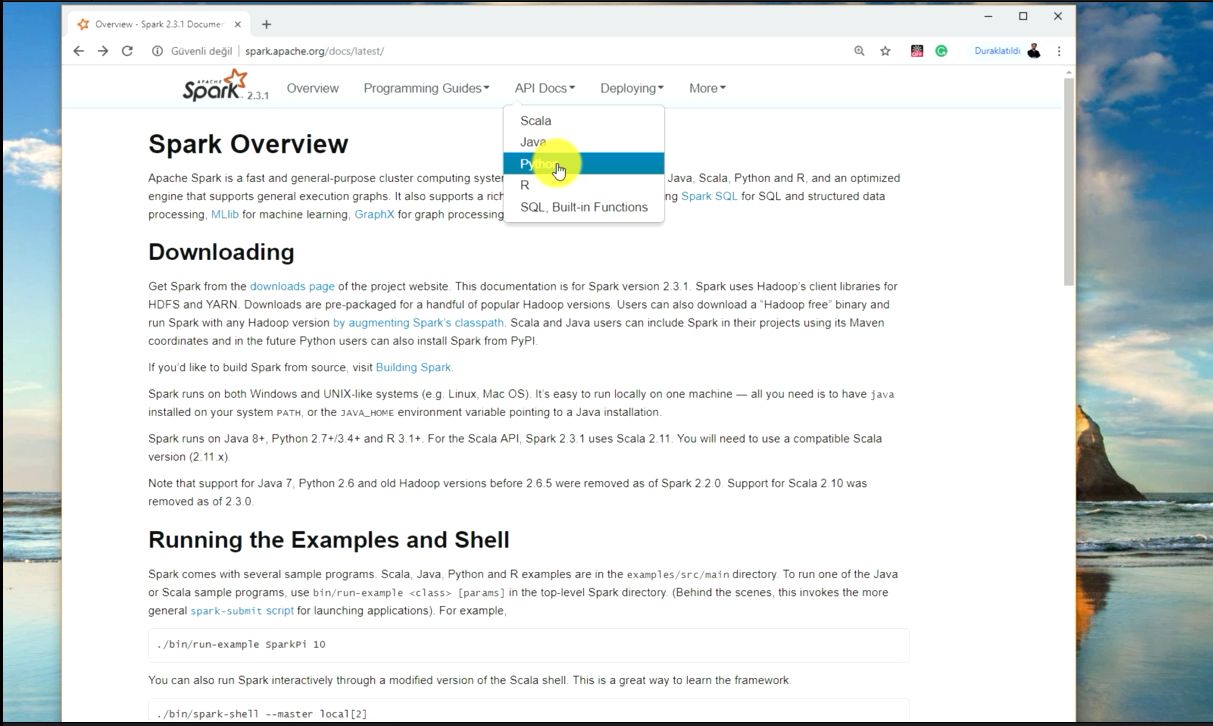

In [29]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark11.png")

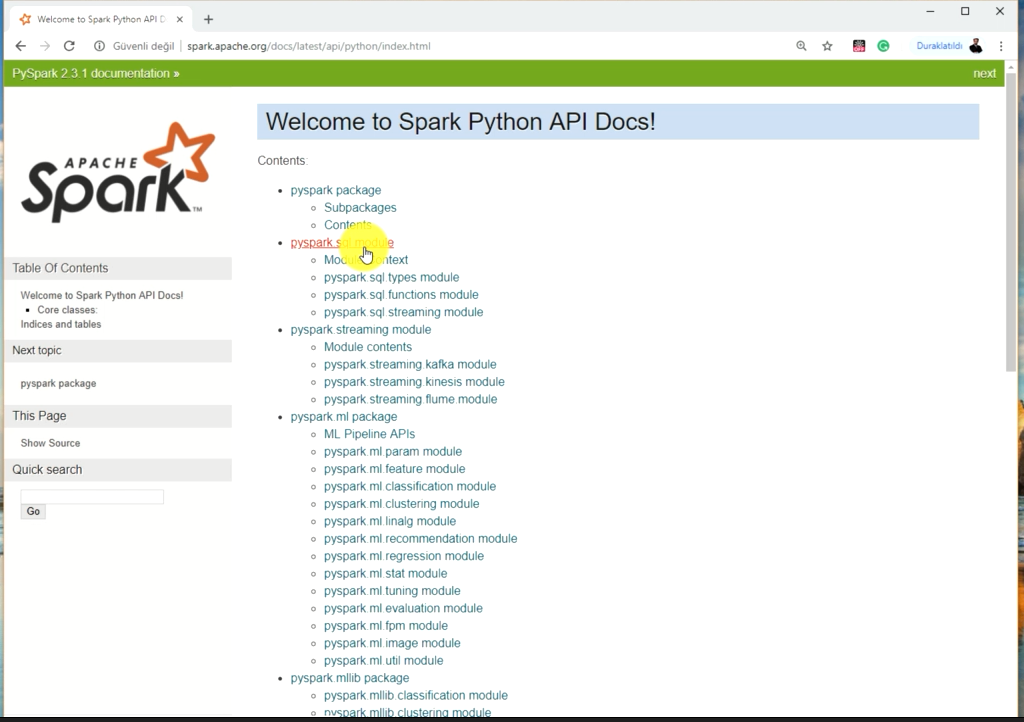

In [30]:
from IPython.display import Image
Image("C:\\Users\\alican\\Desktop\\img\\spark12.png")

In [18]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [14]:
spark =SparkSession.builder. \
master("local[4]"). \
appName("DataFrameFirstApp"). \
config("spark.driver.memory","2g"). \
config("spark.executor.memory","4g"). \
getOrCreate()

**// spark mesos , yarn , kubernetes , local olarak 4 modda çalıştırılabilir.Biz local modda çalışıyoruz.**

In [4]:
sc=spark.sparkContext

 **CREATING DF WITH LIST**

In [5]:
from pyspark.sql import Row
list_rdd=sc.parallelize([1,2,635,4,6,63,]). \
map(lambda x: Row(x))

In [6]:
list_df=list_rdd.toDF(["Numbers"])

In [7]:
list_df.show()

+-------+
|Numbers|
+-------+
|      1|
|      2|
|    635|
|      4|
|      6|
|     63|
+-------+



**CREATING DF WITH RANGE**

In [22]:
df_range=sc.parallelize(range(10,100,5)). \
map(lambda x: (x,)). \
toDF(["range"])

In [23]:
df_range.show()

+-----+
|range|
+-----+
|   10|
|   15|
|   20|
|   25|
|   30|
|   35|
|   40|
|   45|
|   50|
|   55|
|   60|
|   65|
|   70|
|   75|
|   80|
|   85|
|   90|
|   95|
+-----+



In [25]:
# CREATING DF WITH SPARKSESSION

In [15]:
from pyspark.sql.types import IntegerType 
df_from_range2=spark.createDataFrame(range(10,100,5),IntegerType())

**READING CSV FILE**

In [22]:
dv_from_file=spark.read \
.option("sep",";") \
.option("header","True") \
.option("inferSchema","True") \
.csv("C:\\Users\\alican\\Desktop\\SparkData\\OnlineRetail.csv")

In [24]:
dv_from_file.show()

+---------------------------------------------------------------------------------+
|InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country|
+---------------------------------------------------------------------------------+
|                                                             536365,85123A,WHI...|
|                                                             536365,71053,WHIT...|
|                                                             536365,84406B,CRE...|
|                                                             536365,84029G,KNI...|
|                                                             536365,84029E,RED...|
|                                                             536365,22752,SET ...|
|                                                             536365,21730,GLAS...|
|                                                             536366,22633,HAND...|
|                                                             536366,22632,H

In [28]:
dv_from_file=spark.read \
.option("header","True") \
.option("inferSchema","True") \
.csv("C:\\Users\\alican\\Desktop\\SparkData\\OnlineRetail.csv")

In [29]:
dv_from_file.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [30]:
dv_from_file.count()

541909

In [32]:
dv_from_file.select("InvoiceNo","StockCode").show(10)

+---------+---------+
|InvoiceNo|StockCode|
+---------+---------+
|   536365|   85123A|
|   536365|    71053|
|   536365|   84406B|
|   536365|   84029G|
|   536365|   84029E|
|   536365|    22752|
|   536365|    21730|
|   536366|    22633|
|   536366|    22632|
|   536367|    84879|
+---------+---------+
only showing top 10 rows



In [34]:
dv_from_file.sort("InvoiceNo").show(100)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.25|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.

In [35]:
dv_from_file.sort("InvoiceNo").explain()

== Physical Plan ==
*(2) Sort [InvoiceNo#156 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(InvoiceNo#156 ASC NULLS FIRST, 200)
   +- *(1) FileScan csv [InvoiceNo#156,StockCode#157,Description#158,Quantity#159,InvoiceDate#160,UnitPrice#161,CustomerID#162,Country#163] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/alican/Desktop/SparkData/OnlineRetail.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<InvoiceNo:string,StockCode:string,Description:string,Quantity:int,InvoiceDate:string,UnitP...


In [37]:
dv_from_file.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
story_df=spark

In [9]:
my_dictionary={
    "Student":["alican","yilmaz","ahmet","cemil","kamuran"],
    "Grade":[25,63,98,45,78]
        
}

**Yukarıda oncelikle bir python Dictionary olusturduk.**

**Sonrasında ise aşağıda öncelikle bu Dictionary 'i Pandas DataFrame e çevirdik.**

In [10]:
import pandas as pd

In [11]:
pandas_Dataframe=pd.DataFrame(my_dictionary)

In [12]:
pandas_Dataframe.head()

,Student,Grade
0,alican,25
1,yilmaz,63
2,ahmet,98
3,cemil,45
4,kamuran,78


**Yukarıdaki Pandas DataFrame ise asağıda pyspark DataFrame 'e çevirdik.**

In [15]:
pyspark_DataFrame=spark.createDataFrame(pandas_Dataframe)

In [16]:
pyspark_DataFrame.show()

+-------+-----+
|Student|Grade|
+-------+-----+
| alican|   25|
| yilmaz|   63|
|  ahmet|   98|
|  cemil|   45|
|kamuran|   78|
+-------+-----+

